In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.read_csv("../data/Heart_Disease_Prediction.csv")

In [13]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [15]:
df.shape

(270, 14)

In [17]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [23]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [25]:
df.duplicated().sum()

0

# Data Quality Check
The dataset contains 270 records and 14 columns, with all features having complete data and no missing values. Data types are primarily numerical (int64 and float64), with the target variable Heart Disease initially represented as a categorical feature. No duplicate records were found, indicating that the dataset is clean and suitable for exploratory data analysis and machine learning modeling without requiring imputation or deduplication steps.

# Encode the target variable

In [27]:
df["Heart Disease"].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [29]:
df["Heart Disease"] = df["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})

In [31]:
df["Heart Disease"].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

## Target Variable Encoding
The target variable Heart Disease was originally represented as categorical labels (“Presence” and “Absence”). For machine learning modeling, the target was converted into a binary numerical format, where Presence = 1 and Absence = 0. This encoding is necessary because most classification algorithms operate on numerical targets and it enables efficient model training, evaluation, and interpretation of predictive performance.

# Analyze class distribution

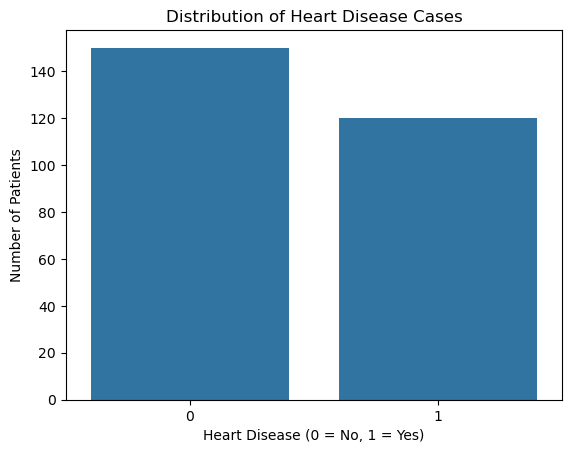

In [33]:
sns.countplot(x="Heart Disease", data=df)
plt.title("Distribution of Heart Disease Cases")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()

In [37]:
#Calculate percentage distributionalculate percentage distribution
df["Heart Disease"].value_counts(normalize=True) * 100

Heart Disease
0    55.555556
1    44.444444
Name: proportion, dtype: float64

## Target Variable Distribution
The dataset shows a moderately balanced distribution between patients with and without heart disease. However, a slight class imbalance is observed, which is common in medical datasets. In healthcare prediction tasks, class imbalance is particularly important because false negatives (failing to identify a patient with heart disease) can have serious consequences. Therefore, evaluation metrics such as recall, F1-score, and ROC-AUC will be prioritized over accuracy in the modeling phase.

# Univariate Analysis (Numerical Features)

In [39]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [41]:
df[num_cols].describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


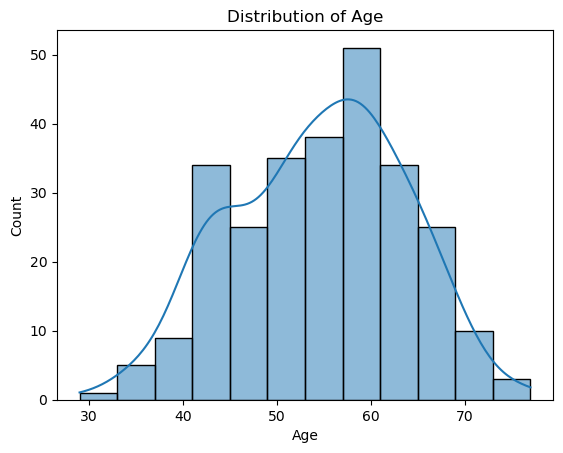

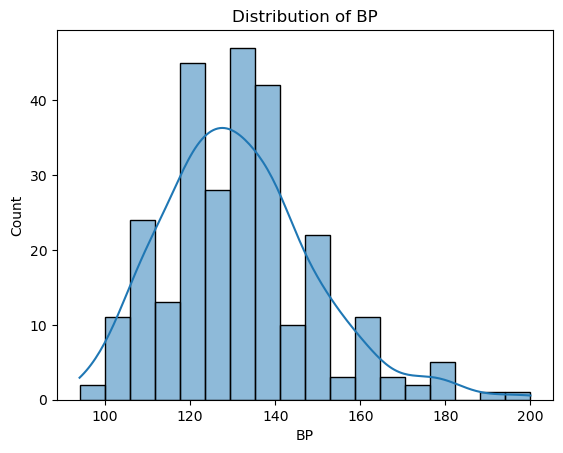

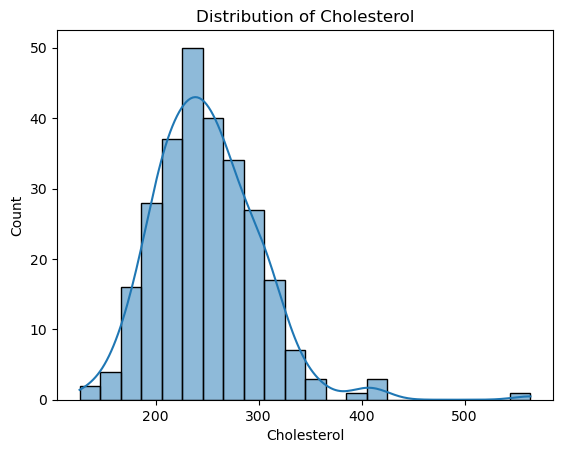

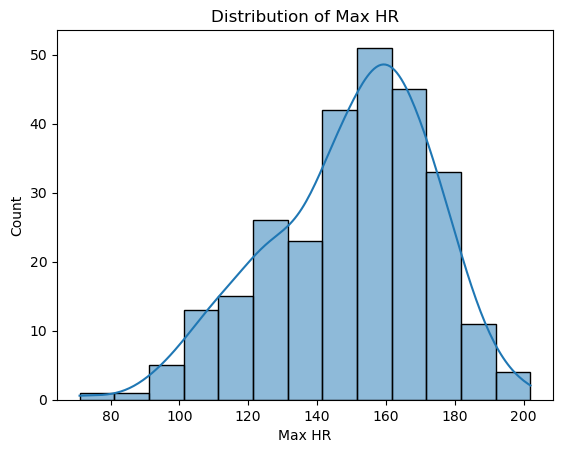

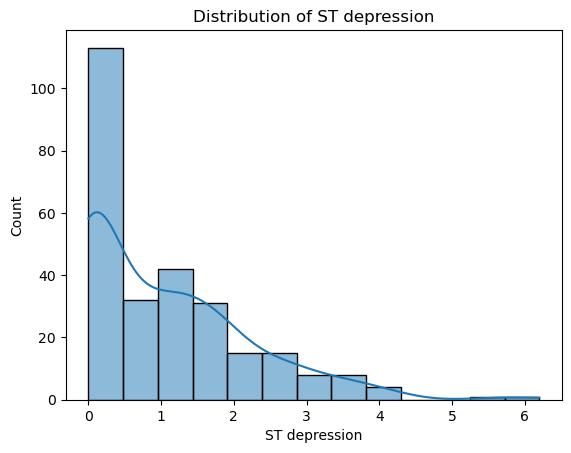

In [43]:
features_to_plot = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]

for col in features_to_plot:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

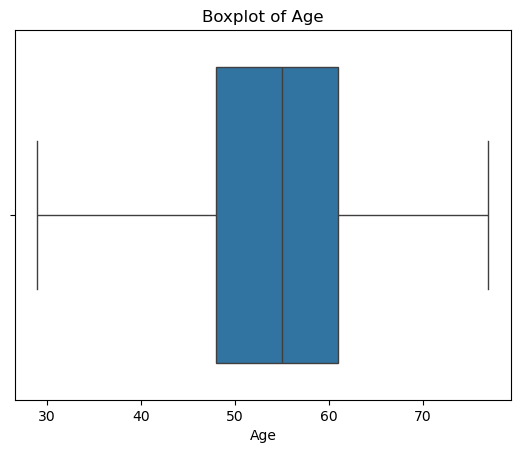

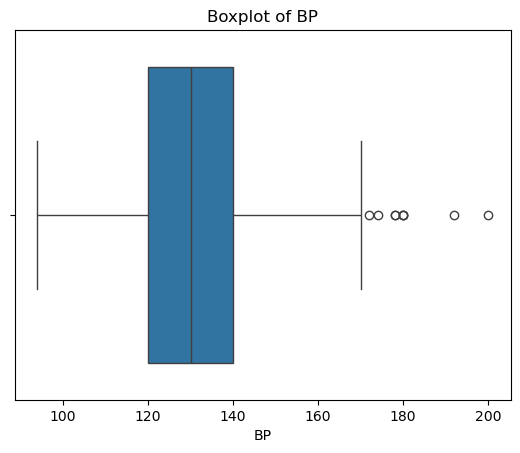

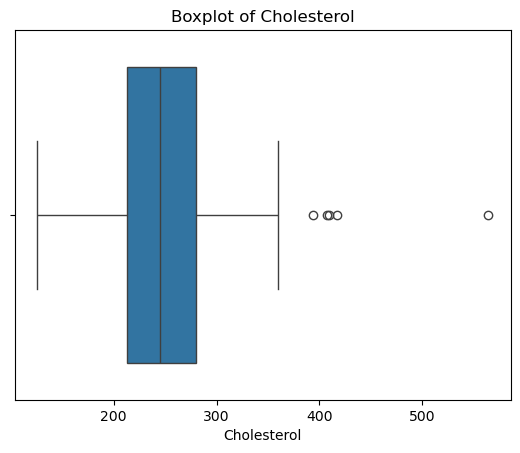

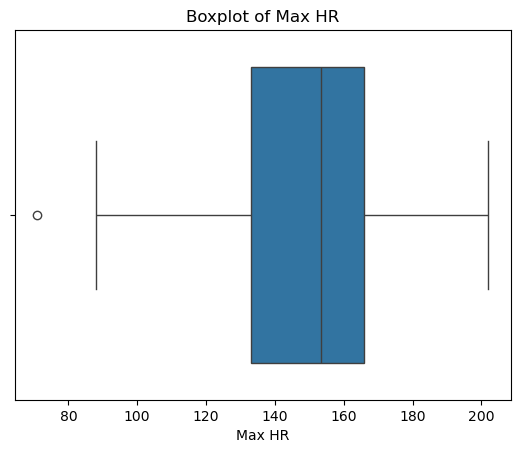

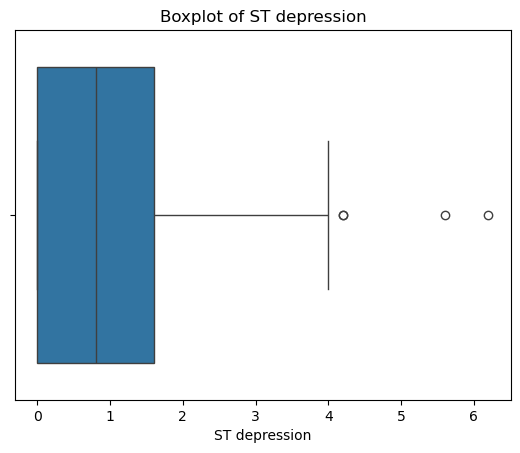

In [45]:
for col in features_to_plot:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Univariate Analysis – Numerical Features

The numerical features show varying distributions across clinical indicators. Age appears approximately normally distributed, while cholesterol and resting blood pressure exhibit right-skewed distributions with noticeable outliers. Maximum heart rate demonstrates a broader spread, reflecting physiological variation across patients. ST depression values are concentrated near lower ranges with a few extreme values, which may indicate higher cardiac risk. These observations suggest the presence of outliers and skewness in certain features, which will be considered during preprocessing and model selection.

# Bivariate Analysis (Features vs Heart Disease)

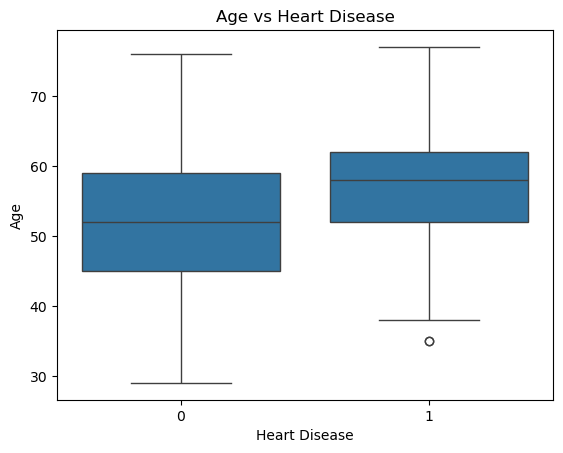

In [47]:
sns.boxplot(x="Heart Disease", y="Age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

### Age and Heart Disease
Patients diagnosed with heart disease tend to be older on average compared to those without the condition. This suggests that age is a significant risk factor and may contribute meaningfully to predictive performance in the modeling stage.

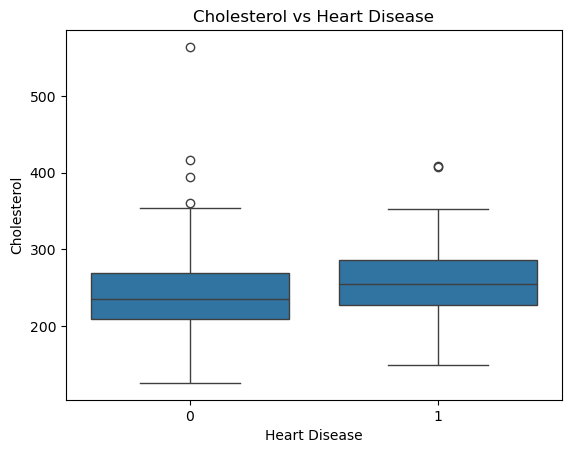

In [49]:
sns.boxplot(x="Heart Disease", y="Cholesterol", data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

### Cholesterol and Heart Disease
Individuals with heart disease generally show higher cholesterol levels, with greater variability and the presence of extreme values. Elevated cholesterol appears to be associated with increased cardiac risk, reinforcing its importance as a predictive feature.

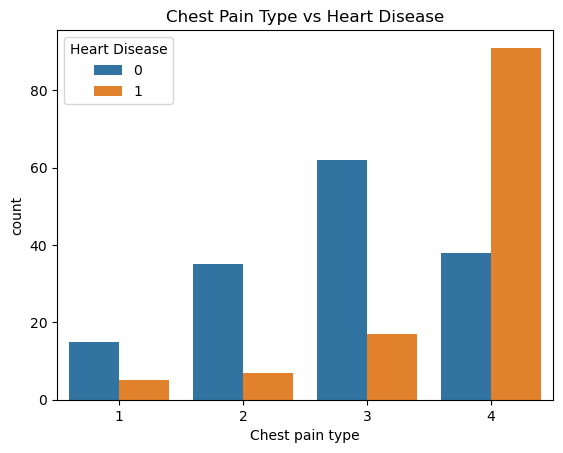

In [51]:
sns.countplot(x="Chest pain type", hue="Heart Disease", data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

### Chest Pain Type and Heart Disease
Chest pain type shows a strong association with heart disease presence. Certain chest pain categories exhibit a significantly higher proportion of positive heart disease cases, indicating that this feature is one of the most influential predictors and should be retained during model training.

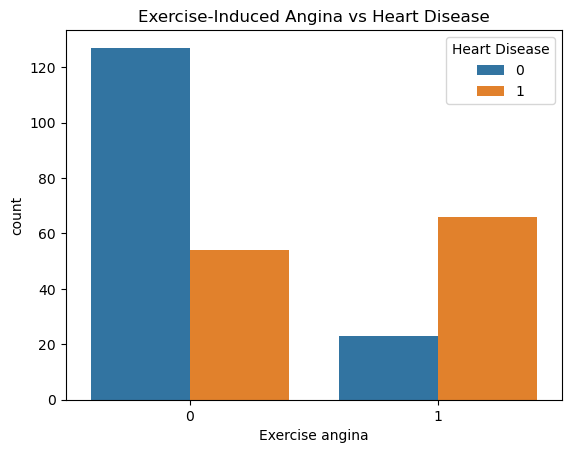

In [53]:
sns.countplot(x="Exercise angina", hue="Heart Disease", data=df)
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.show()


### Exercise-Induced Angina and Heart Disease
Patients experiencing exercise-induced angina display a noticeably higher incidence of heart disease. This aligns with clinical expectations and highlights the feature’s relevance in risk assessment.

# Correlation Analysis

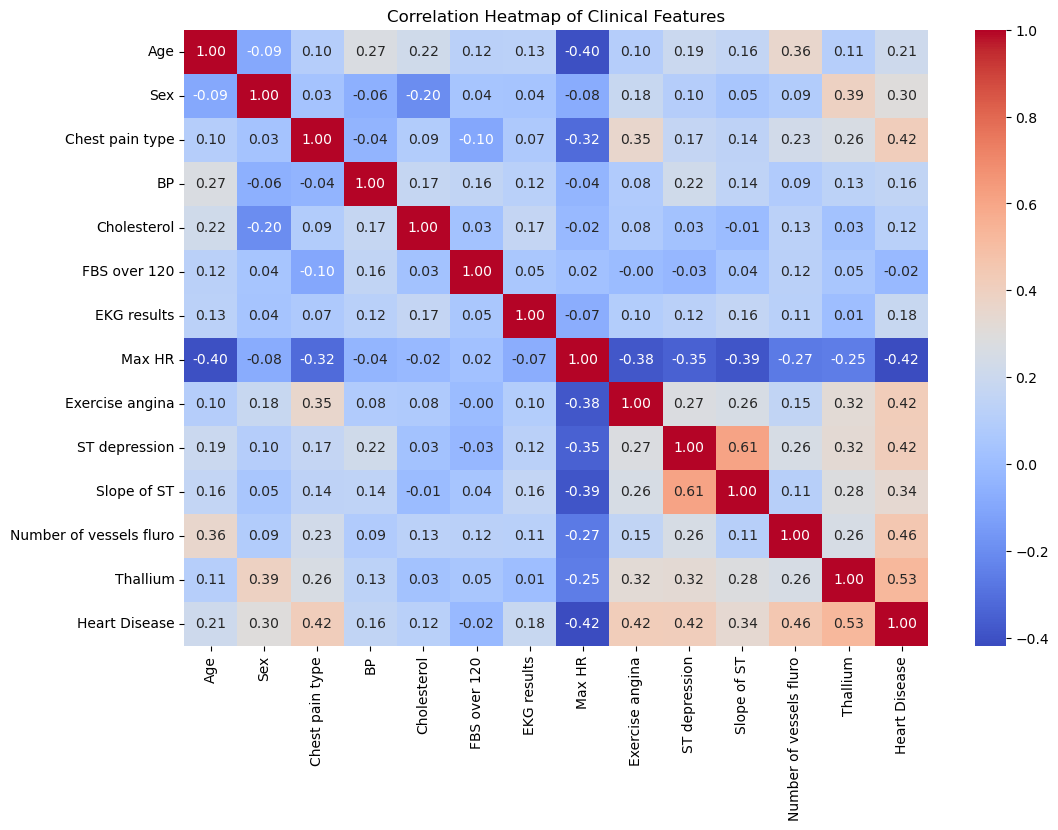

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Clinical Features")
plt.show()

## Correlation Analysis
The correlation heatmap reveals meaningful relationships among clinical features. Age shows moderate correlations with several cardiovascular indicators, while maximum heart rate demonstrates a negative association with age and heart disease presence. ST depression exhibits a positive correlation with heart disease, indicating its importance as a risk marker. Although some features display moderate intercorrelation, no extreme multicollinearity is observed, suggesting that most variables can be retained for model training.

# Key Exploratory Insights

- Heart disease prevalence increases with age, indicating age as a significant risk factor.

- Certain chest pain types show a strong association with the presence of heart disease.

- Elevated cholesterol and resting blood pressure are more common among patients diagnosed with heart disease.

- Exercise-induced angina is strongly linked to positive heart disease cases.

- ST depression values are higher among patients with heart disease, highlighting its predictive relevance.

- Maximum heart rate tends to be lower in patients with heart disease, suggesting reduced cardiovascular performance.

- The dataset is clean, with no missing values or duplicate records, making it suitable for machine learning modeling.